# Import Dataset

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
%matplotlib inline

# Import Dataset

In [148]:
train = pd.read_csv('train.csv')

In [149]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
train.set_index('PassengerId', inplace=True)

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [152]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling Missing Values

<AxesSubplot:ylabel='PassengerId'>

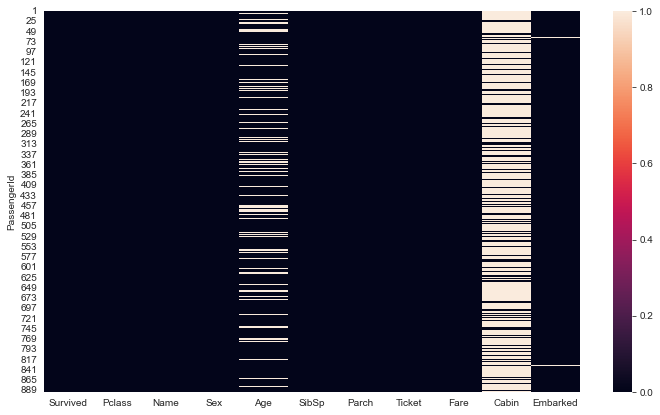

In [153]:
plt.figure(figsize=(12,7))
sns.heatmap(train.isnull())

In [154]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [155]:
categorical_columns = [col for col in train.columns if train[col].dtype == 'O']
numerical_columns = [col for col in train.columns if train[col].dtype != 'O']

In [156]:
categorical_with_na = [col for col in categorical_columns if train[col].isnull().sum() > 0]
numerical_with_na = [col for col in numerical_columns if train[col].isnull().sum() > 0]

## Numerical Columns

In [157]:
numerical_with_na

['Age']

### Mean/Median Imputation

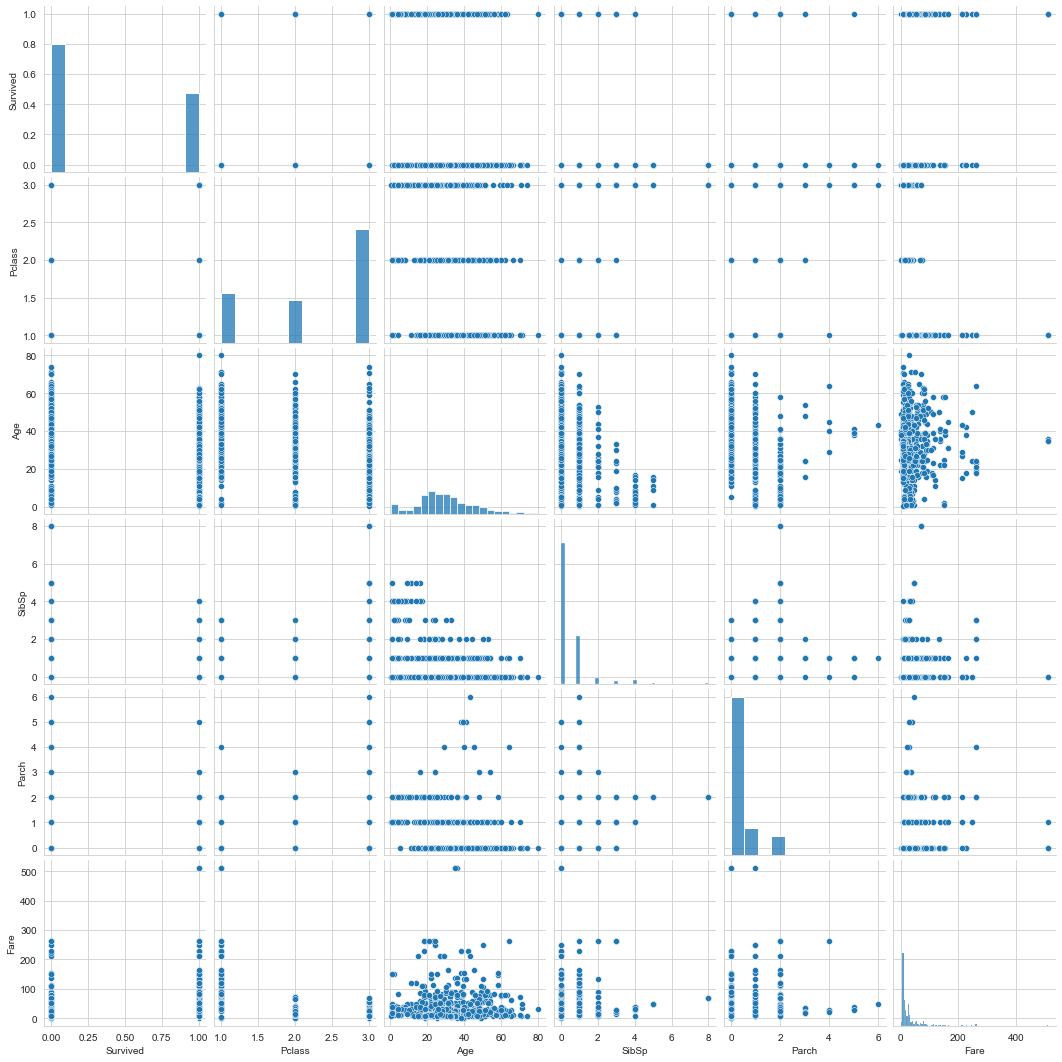

In [158]:
sns.pairplot(train)

In [159]:
train['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='Age', ylabel='Density'>

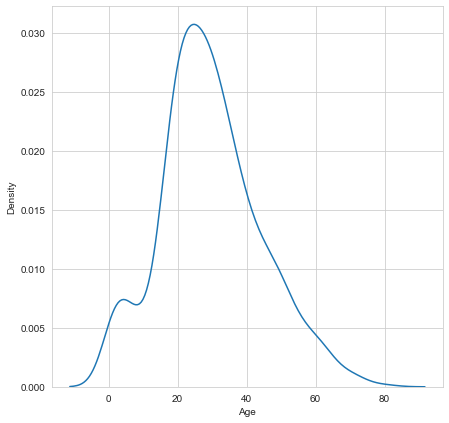

In [160]:
fig, axes = plt.subplots(1,1, figsize=(7, 7))
sns.set_style('whitegrid')
sns.kdeplot(train.Age)

In [161]:
train_mean = train.copy()
train_mean['Age'] = train.Age.fillna(train.Age.mean())

In [162]:
train_mode = train.copy()
train_mode['Age'] = train.Age.fillna(train.Age.median())

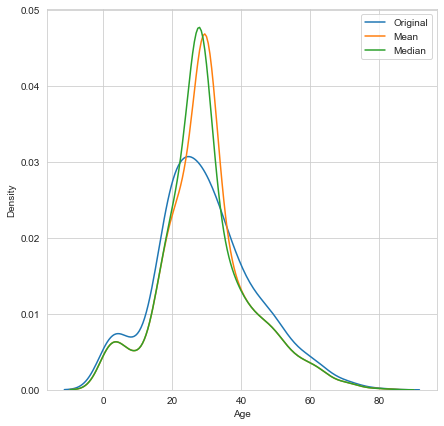

In [163]:
fig, axes = plt.subplots(1,1, figsize=(7, 7))
sns.set_style('whitegrid')
sns.kdeplot(train.Age, label='Original')
sns.kdeplot(train_mean.Age, label='Mean')
sns.kdeplot(train_mode.Age, label='Median')
axes.legend()

### Predicting Age

In [164]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [165]:
X_train_age = train[['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket','Fare', 'Cabin','Embarked', 'Age']].copy()
y_train_age = train[['Age']].copy()

In [166]:
for column in X_train_age:
    if X_train_age[column].isnull().sum() > 0 and column != 'Age':
        X_train_age.drop([column], axis=1, inplace=True)

In [167]:
X_train_age.dropna(axis=0, inplace=True)
X_train_age.drop(['Age'], axis=1, inplace=True)

In [168]:
y_train_age.dropna(axis=0, inplace=True)

In [169]:
X_train_age.shape

(714, 7)

In [170]:
y_train_age.shape

(714, 1)

In [171]:
X_train_age.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [172]:
y_pred = train.loc[train.Age.isnull(), X_train_age.columns]

In [173]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), ['Sex'])], remainder='passthrough')

X_train_age = ct.fit_transform(X_train_age)

y_pred = ct.transform(y_pred)

In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_age[:, 1:] = scaler.fit_transform(X_train_age[:, 1:])
y_pred[:, 1:] = scaler.fit_transform(y_pred[:, 1:])

y_train_age = y_scaler.fit_transform(y_train_age)

In [175]:
import xgboost as xgb

age_regressor = xgb.XGBRegressor()

In [176]:
age_regressor.fit(X_train_age, y_train_age)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [178]:
r2_score(y_train_age, age_regressor.predict(X_train_age))

0.7234836148728964

In [179]:
mean_absolute_error(y_train_age, age_regressor.predict(X_train_age))

0.3536629642530258

In [180]:
import math
math.sqrt(mean_squared_error(y_train_age, age_regressor.predict(X_train_age)))

0.5258482529467067

In [181]:
null_age = y_scaler.inverse_transform(age_regressor.predict(y_pred))

In [182]:
train_pred_age = train.copy()    

In [183]:
null_age_id = train.loc[train.Age.isnull(), :].index
train_pred_age.loc[train.loc[train.Age.isnull(), :].index, 'Age'] = null_age

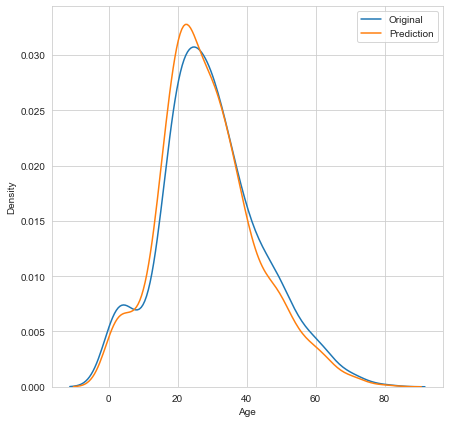

In [184]:
fig, axes = plt.subplots(1,1, figsize=(7, 7))
sns.set_style('whitegrid')
sns.kdeplot(train.Age, label='Original')
sns.kdeplot(train_pred_age.Age, label='Prediction')
axes.legend()

## Categorical Columns

#### Embarked

In [185]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

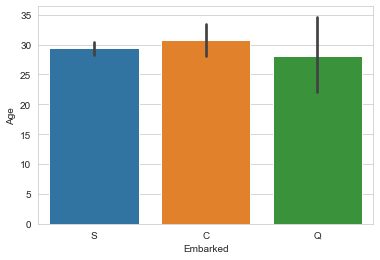

In [186]:
sns.barplot(x='Embarked', y='Age', estimator=np.mean, data=train)

In [194]:
def compute_age_category(row):
    
    age = row.Age
    category = None
    
    if age < 10:
        category = 'infant'
    elif age < 20:
        category = 'teen'
    elif age < 55:
        category = 'adult'
    else:
        category = 'old'
    
    return category

In [195]:
train_embarked = train_pred_age.copy()

In [197]:
train_embarked['Age_class'] = train_pred_age.apply(compute_age_category, axis=1)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

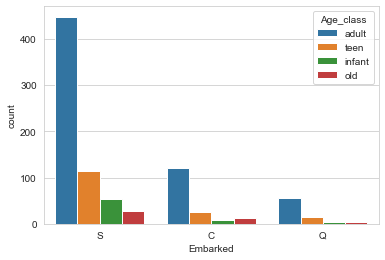

In [202]:
sns.countplot(x='Embarked', data=train_embarked, hue='Age_class')

In [207]:
train_embarked[train_embarked.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_class
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,adult
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,old


In [210]:
train_embarked.loc[62, 'Embarked'] = 'S'
train_embarked.loc[830, 'Embarked'] = 'S'

<AxesSubplot:xlabel='Fare', ylabel='Fare'>

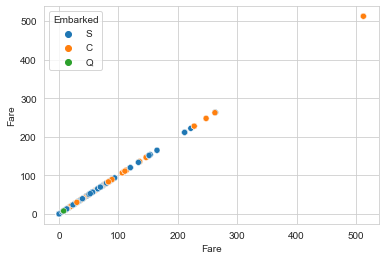

In [212]:
sns.scatterplot(x='Fare', y='Fare', data=train_embarked, hue='Embarked')

In [236]:
train[(train_embarked.Fare > 65) & (train_embarked.Fare < 95)].groupby('Embarked').size()

Embarked
C    23
Q     2
S    36
dtype: int64

In [239]:
train[(train_embarked.Fare > 79) & (train_embarked.Fare < 81)].groupby('Embarked').size()

Embarked
C    4
S    3
dtype: int64